In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
 df = pd.read_csv('customer_segmentation.csv')

In [33]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [34]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [35]:
df.isnull().sum() 

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [36]:
df = df.dropna()

In [37]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [38]:
df = df.drop(['Response', 'Z_CostContact', 'Z_Revenue'], axis=1)

In [39]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,8,10,4,7,0,0,0,0,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,1,2,5,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,8,2,10,4,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,2,0,4,6,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,3,6,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,9,3,4,5,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,8,2,5,7,0,0,0,1,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,2,3,13,6,0,1,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,6,5,10,3,0,0,0,0,0,0


In [40]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1                 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [41]:
df = remove_outliers(df, 'Income')
df = remove_outliers(df, 'Year_Birth')

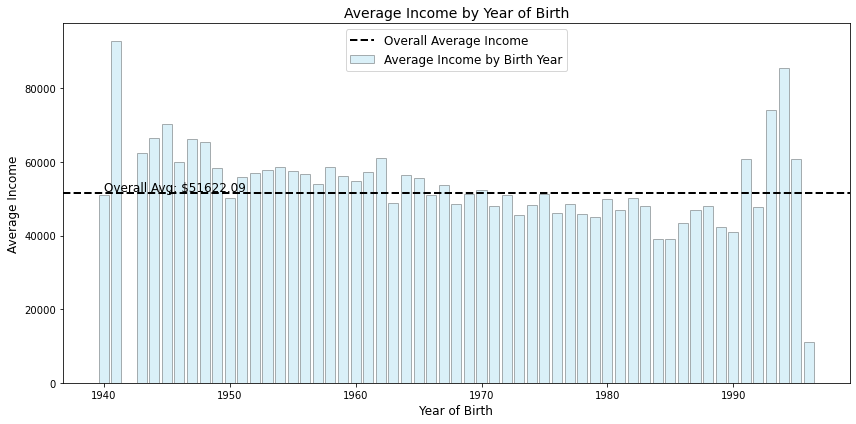

In [42]:
average_income_by_year = df.groupby('Year_Birth')['Income'].mean()
overall_avg_income = df['Income'].mean()

plt.figure(figsize=(12, 6))
plt.bar(average_income_by_year.index, average_income_by_year.values, color='skyblue', edgecolor='black',
        alpha=0.3, label='Average Income by Birth Year')
plt.axhline(y=overall_avg_income, color='black', linestyle='--', linewidth=2, label='Overall Average Income')
plt.text(average_income_by_year.index.min(), overall_avg_income + 500, f'Overall Avg: ${overall_avg_income:.2f}', 
         color='black', fontsize=12, ha='left')

plt.xlabel('Year of Birth', fontsize=12)
plt.ylabel('Average Income', fontsize=12)
plt.title('Average Income by Year of Birth', fontsize=14)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

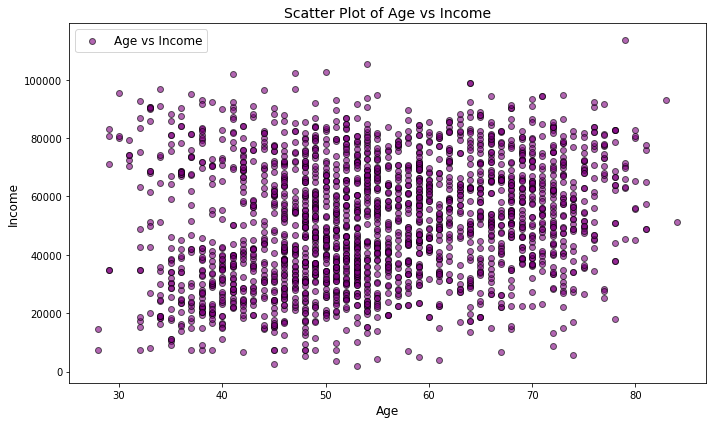

In [43]:
current_year = 2024
df['age'] = current_year - df['Year_Birth']


plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['Income'], color='purple', alpha=0.6, edgecolor='black', label='Age vs Income')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.title('Scatter Plot of Age vs Income', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

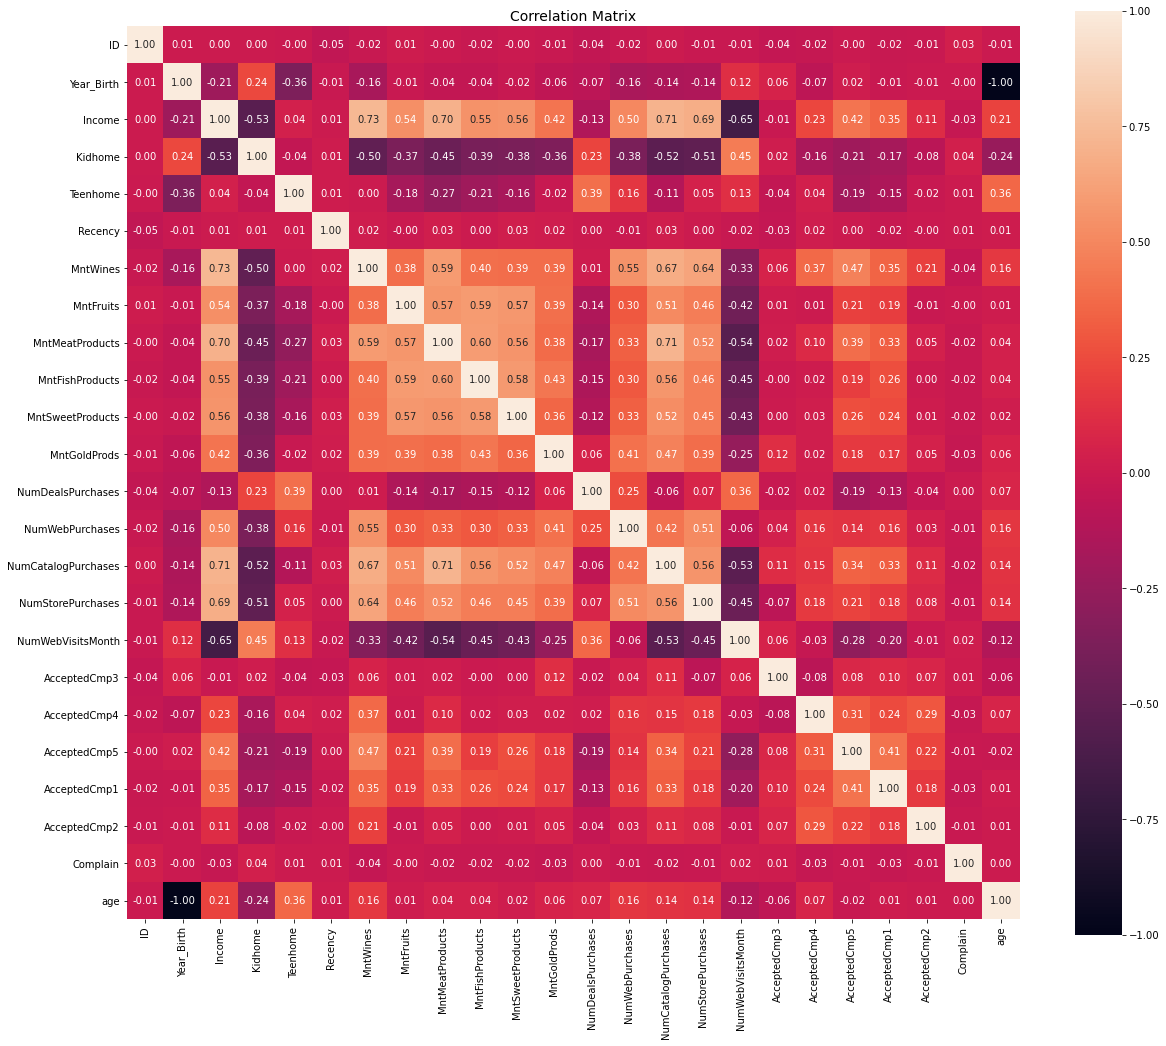

In [53]:
plt.figure(figsize=(20, 17))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cbar=True, square=True)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

In [54]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'age'],
      dtype='object')

In [55]:
columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
           'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'age']


data = df[columns]

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
from sklearn.cluster import KMeans

In [58]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [59]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

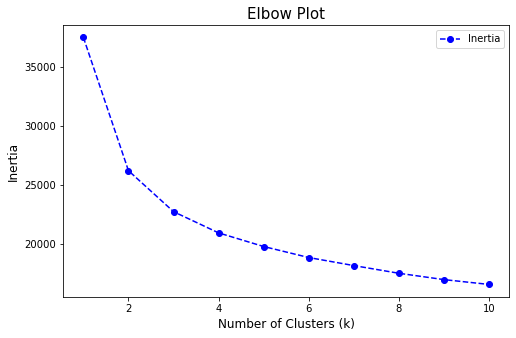

In [60]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b', label="Inertia")
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Plot', fontsize=15)
plt.legend()
plt.show()

In [62]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k)
df['Cluster'] = kmeans.fit_predict(scaled_data)

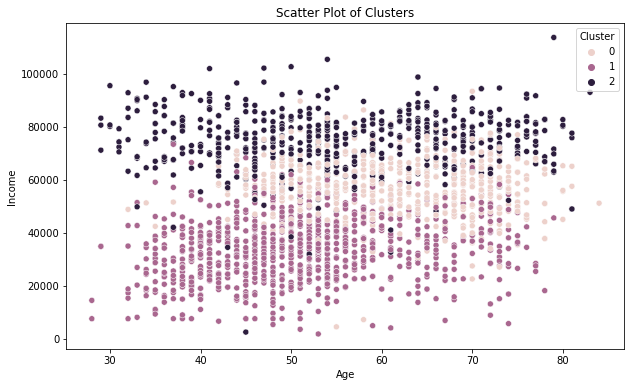

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='Income', hue='Cluster')
plt.title('Scatter Plot of Clusters')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [66]:
from sklearn.linear_model import LinearRegression

In [65]:
x_variable = 'age'
y_variable = 'Income'

In [68]:
x = df[[x_variable]].values
y = df[y_variable].values

In [69]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [70]:
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

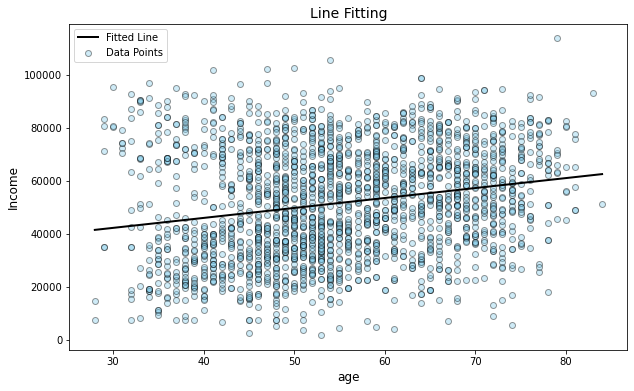

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Data Points", alpha=0.4, color='skyblue', edgecolor='black')
plt.plot(x_range, y_pred, linestyle='-', color='black', linewidth=2, label="Fitted Line")
plt.xlabel(x_variable, fontsize=12)
plt.ylabel(y_variable, fontsize=12)
plt.title("Line Fitting", fontsize=14)
plt.legend(fontsize=10)
plt.show()